In [1]:
# define logging and working directory
# ------------------------------------------
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
# jupyter magic config
# ------------------------------------------
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# this should import glob, os, and many other standard libs
# ------------------------------------------ 
from src.utils.Notebook_imports import *
# local imports
# ------------------------------------------ 
from src.utils.Utils_io import Console_and_file_logger, init_config
# import external libs
# ------------------------------------------ 
import pandas as pd
import numpy as np
from ipyfilechooser import FileChooser
import glob
import os

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models


In [3]:
# predict and 
# evaluate / calc dice and hd
from src.models.Evaluate_moved_myo import calc_dice
from src.models.predict_motion_model import pred_fold
import os
sds_storage = '/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001/'
data_root = '/mnt/ssd/data/dmd/02_imported_4D_unfiltered/'
fchooser = FileChooser(sds_storage, '')
display(fchooser)
@interact
def calc_scores(run=False):
    if run:
        exp_path = fchooser.selected
        gt_path = os.path.join(exp_path, 'gt_m')
        pred_path = os.path.join(exp_path, 'pred_m')
        cfg_file = os.path.join(exp_path,'config/config.json')
        print('config given: {}'.format(cfg_file))
        # load the experiment config
        with open(cfg_file, encoding='utf-8') as data_file:
            config = json.loads(data_file.read())

            EXPERIMENT = config.get('EXPERIMENT', 'UNDEFINED')
            Console_and_file_logger(EXPERIMENT, logging.INFO)
            config['MODEL_PATH'] = os.path.join(exp_path, 'model/')
            config['EXP_PATH'] = exp_path
            config['DATA_PATH_SAX'] = os.path.join(data_root, 'sax')
            config['DF_FOLDS'] = os.path.join(data_root, 'df_kfold.csv')
            config['DF_META'] = os.path.join(data_root, 'SAx_3D_dicomTags_phase.csv')
            info('Loaded config for experiment: {}'.format(EXPERIMENT))
        pred_fold(config) # that way we predict and evaluate, because of a previous prediction bug
        if not os.path.exists(pred_path):
            print('prediction')
        calc_dice(gt_path, pred_path, exp_path)

FileChooser(path='/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001', …

interactive(children=(Checkbox(value=False, description='run'), Output()), _dom_classes=('widget-interact',))

In [4]:
df_files = ['/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001/dmd/smoothmyo_mloss001_f0/2021-10-08_16_18/', 
           '/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001/dmd/smoothmyo_mloss001_f1/2021-10-08_20_55/',
           '/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001/dmd/smoothmyo_mloss001_f2/2021-10-09_00_47/',
           '/mnt/sds/sven/code/dynamic-cmr-models/exp/temp/phase2phase/v3/64_128_128/window1/reg0_001/dmd/smoothmyo_mloss001_f3/2021-10-09_02_54/']

dfs = [pd.read_csv(os.path.join(f,'results.csv')) for f in df_files]

In [5]:
df = pd.concat(dfs)

[(0.0, 1.0)]

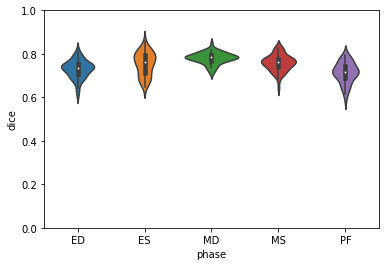

In [6]:
import seaborn as sb
g = sb.violinplot(x='phase', y='dice', data=df[['patient', 'phase', 'dice']])
g.set(ylim=(0,1))

[(0.0, 25.0)]

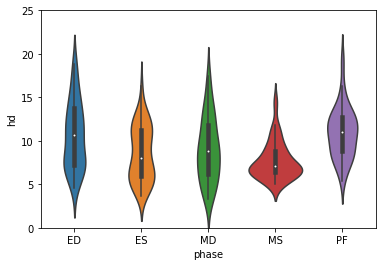

In [7]:
g = sb.violinplot(x='phase', y='hd', data=df[['patient', 'phase', 'hd']])
g.set(ylim=(0, 25))

In [18]:
# mean
df.groupby('phase').mean().style.highlight_min(color = 'lightgreen', axis = 0, subset=['hd']).highlight_max(color = 'lightgreen', axis = 0, subset=['dice'])

,dice,hd
phase,,
ED,0.730595,10.598242
ES,0.754767,8.564793
MD,0.781138,9.032958
MS,0.759329,7.702209
PF,0.714064,10.940881


In [19]:
# median
df.groupby('phase').median().style.highlight_min(color = 'lightgreen', axis = 0, subset=['hd']).highlight_max(color = 'lightgreen', axis = 0, subset=['dice'])

,dice,hd
phase,,
ED,0.737090,10.630146
ES,0.760387,8.062258
MD,0.785060,8.774964
MS,0.761131,7.071068
PF,0.715573,11.045361


In [20]:
# std
df.groupby('phase').std().style.highlight_min(color = 'lightgreen', axis = 0, subset=['hd']).highlight_max(color = 'lightgreen', axis = 0, subset=['dice'])

,dice,hd
phase,,
ED,0.041200,3.809302
ES,0.053213,3.147351
MD,0.026268,3.676962
MS,0.037426,2.127752
PF,0.047575,2.927505


In [28]:
# fast reverse compose test
temp = [0,1,2,3,4]
[list(reversed(temp[:i])) for i in range(2, len(temp) + 1)]

[[1, 0], [2, 1, 0], [3, 2, 1, 0], [4, 3, 2, 1, 0]]